In [55]:
import mne
from mne.datasets import eegbci
from mne.io import *
from mne.viz import *
import matplotlib.pyplot as plt

%matplotlib inline
mne.set_log_level('WARNING')

subject = 1  # use data from subject 1
runs = [6, 10, 14]  # use only hand and feet motor imagery runs

fnames = eegbci.load_data(subject, runs)
raws = [read_raw_edf(f, preload=True, stim_channel='auto') for f in fnames]
raw = concatenate_raws(raws)

raw.rename_channels(lambda x: x.strip('.'))  # remove dots from channel names

# print(raw)
# print(raw.info)
# print(raw.info['ch_names'])

/sgoinfre/goinfre/Perso/pdespres/anaconda3/envs/mne/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


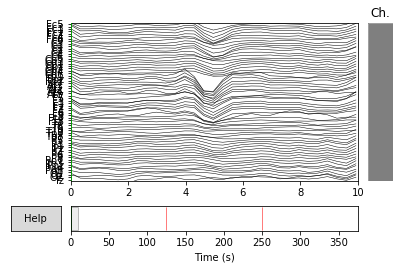

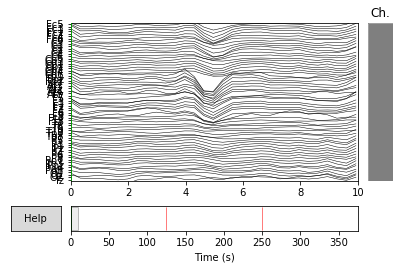

In [56]:
events = mne.find_events(raw, shortest_event=1, stim_channel='STI 014')
# raw2=raw.copy()
# Apply band-pass filter
raw.filter(None, 1., method='iir')
raw.pick_types(eeg=True,meg=False, stim=False, eog=False, exclude='bads').plot(n_channels=64, block=True)
# raw.pick_types(eeg=True,meg=False, stim=False, eog=False, exclude='bads').resample(sfreq=4).plot(n_channels=64, block=True)

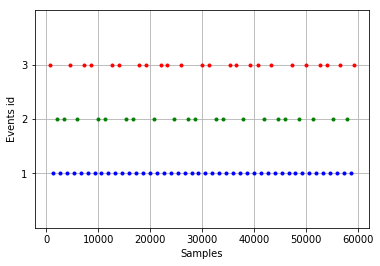

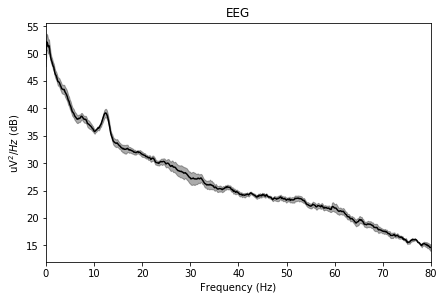

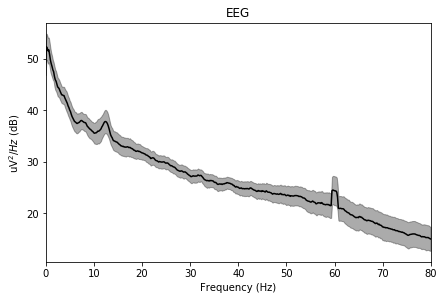

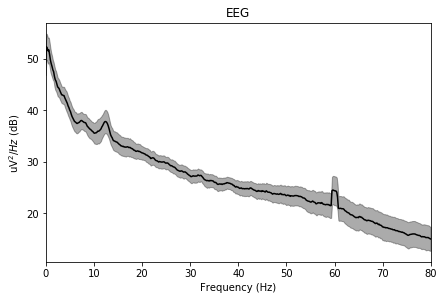

In [42]:
events = mne.find_events(raw, shortest_event=1, stim_channel='STI 014')

tmin, tmax = -1, 4  # define epochs around events (in s)
event_ids = dict(hands=2, feet=3)  # map event IDs to tasks

picks = mne.pick_channels(raw.info["ch_names"], ["C3", "Cz", "C4"])
epochs = mne.Epochs(raw, events, event_ids, tmin - 0.5, tmax + 0.5,
                    picks=picks, baseline=None, preload=True)
plot_events(events)
epochs.plot_psd()
picks = mne.pick_types(raw.info, eeg=True, meg=False,eog=False, stim=False, exclude='bads')
epochs = mne.Epochs(raw, events, event_ids, tmin - 0.5, tmax + 0.5,
                    picks=picks, baseline=None, preload=True)
epochs.plot_psd()

In [17]:
raw.info['bads']

[]